# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-info"> <b>Задача</b>

Основной задачей является установить параметры, влияющие на стоимость недвижимости, в данном случае квартир.
Для начала мы изучим данные, которые нам предоставили: посмотрим общую информацию о таблице, найдем пропуски и странные данные. После этого примем решение, что с ними сделать. Проведем предобработку данных. 
Далее проведем непосредственно анализ данных, и на основании результата сделаем вывод, где будут даны основные параметры, влияющих на цену. И, возможно, дополнительные комментарии, которые появятся в ходе исследования. </div>

## Откройте файл с данными и изучите общую информацию. <a name="research"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #предварительный анализ показал, что разделителем является "\t"
data.info()
print()
display(data.head(10))
print()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Удобнее будет перевести строки с датой и временем в формат дата/время.

In [2]:
data.isna().sum() #проверим наличие пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Очень много пропущенных значений.
1. Высота потолков, всего этажей в доме, жилую площадь, пощадь кухни - при необходимости можно заменить медианой в зависимости от населенного пункта, процентного соотношения к общей площади по группам. Но это нецелесообразно будем работать с тем, что есть.
2. Аппартаменты и наличие балкона пропущены скорее всего из-за того, что квартира не относится к аппартаментам и балкона нет, поэтому можно будет заменить на False/ноль.
3. Населенный пункт - думаю такие строки лучше удалить, потому что люди всегда ищут объявления по городу. Зачем квартира неизвестно где?
4. Расстояние до парков, прудов и аэропорта люди скорее всего не заполняют из-за лени или незнания или и всё вместе. Заполнить отсутствующие данные будет проблематично. В задании сказано, что эти данные расчитываются автоматически. Тогда возникает закономерный вопрос: почему так много незаполненных данных? Нужно доработать эту систему: ведь очень-очень редко люди не указывают адрес дома, это единичные случаи. Это либо сбой в программе, либо при сборе данных.

In [3]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

Стобец "этаж" в порядке, никаких отклонений нет.

In [4]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Есть квартиры с нулевым количеством комнат. Возможно это студии и квартиры с открытой планировкой. Проверим.

In [5]:
print('Количество студий и квартир с открытой планировкой, где не указано количество комнат -', \
      data[((data['rooms'] == 0) & (data['studio'] == True)) \
      | (data['rooms'] == 0) & (data['open_plan'] == True)]['rooms'].count())

Количество студий и квартир с открытой планировкой, где не указано количество комнат - 197


Да, всё верно, предположение подтвердилось.

In [6]:
print(data['last_price'].describe()) #посмотрим описательную статистику колонки "last_price"
print('Количество объявлений с ценой меньше 400 т.р. -', data[data['last_price'] < 400000]['last_price'].count())
print('Количество объявлений с ценой больше 100 миллионов р. -', data[data['last_price'] > 100000000]['last_price'].count())

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
Количество объявлений с ценой меньше 400 т.р. - 1
Количество объявлений с ценой больше 100 миллионов р. - 37


Большая разница между минимальным и максималльным значениями, 12 тысяч и 763 миллиона.
Скорее всего в цене квартиры за 12 тысяч продавец просто забыл добавить несколько нолей. Проще будет удалить это значение, но так же можно найти медиану цены в зависимости от таких параметров как площадь, город, удаленность от центра и т.д.
А квартир со стоимостью более 100 миллионов всего 37 штук. Скорее всего это элитное жилье.
Средний разброс цен составляет 10,1 миллионов, я думаю это корректная сумма, так как в таблице дан не только Санкт-Петербург, а еще и соседние города.

In [7]:
print(data['total_area'].describe()) #посмотрим описательную статистику колонки "total_area"
print('Количество объявлений с общей площадью меньше 20 кв. -', data[data['total_area'] < 20]['last_price'].count())
print('Количество объявлений с общей площадью больше 600 кв. -', data[data['total_area'] > 600]['last_price'].count())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
Количество объявлений с общей площадью меньше 20 кв. - 27
Количество объявлений с общей площадью больше 600 кв. - 4


Ничего необычного за исключением слишком большого максимального значения. Скорее всего это опять элитное жилье. А небольшая кадратура это просто дешевое жилье, квартиры студии.

In [8]:
#проверим булевы колонки
print('Колонка студия:')
print(data['studio'].value_counts())
print()
print('Свободная планировка:')
print(data['open_plan'].value_counts())

Колонка студия:
False    23550
True       149
Name: studio, dtype: int64

Свободная планировка:
False    23632
True        67
Name: open_plan, dtype: int64


Ничего необычного.

In [9]:
print('Количество дублей строк - ', data.duplicated().sum()) #дубли отсутствуют

Количество дублей строк -  0


## Вывод

Итого имеем очень большое количество отсутствующих данных, некоторые из которых можно будет заменить. А такие как расстояние до аэропорта, парков и водоёмов оставим как есть. Регистр у населенных пунктов разный - исправим это. 

## Предобработка данных <a name="preprocessing"></a>

In [10]:
display(data[(data['last_price'] < 400000)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Избавимся от этой строки со слишком маленькой ценой.

In [11]:
data = data[~(data['last_price'] < 400000)] #избавимся от строки со слишком маленькой ценой
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23698 non-null int64
last_price              23698 non-null float64
total_area              23698 non-null float64
first_day_exposition    23698 non-null object
rooms                   23698 non-null int64
ceiling_height          14503 non-null float64
floors_total            23612 non-null float64
living_area             21795 non-null float64
floor                   23698 non-null int64
is_apartment            2775 non-null object
studio                  23698 non-null bool
open_plan               23698 non-null bool
kitchen_area            21420 non-null float64
balcony                 12180 non-null float64
locality_name           23649 non-null object
airports_nearest        18156 non-null float64
cityCenters_nearest     18179 non-null float64
parks_around3000        18180 non-null float64
parks_nearest           8078 non-null float64
ponds_around300

In [12]:
#приведем время в нужный формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заполним пропуски в столбце аппартаменты и проверим значения в этой колонке.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print('Количество пропущенных значений в колонке аппартаменты -', data['is_apartment'].isna().sum())
print(data['is_apartment'].value_counts())

Количество пропущенных значений в колонке аппартаменты - 0
False    23648
True        50
Name: is_apartment, dtype: int64


Заменим пропущенные значения в колонке балконы на "0", так как скорее всего, если балкон не указаны, то его нет.

In [14]:
data['balcony'] = data['balcony'].fillna(0)
print('Количество пропущенных значений в колонке аппартаменты -', data['balcony'].isna().sum())
print(data['balcony'].value_counts())

Количество пропущенных значений в колонке аппартаменты - 0
0.0    15276
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


Очень большое количество различных населенных пунктов. Можно попробовать заменить букву "ё" на "е".

In [15]:
data['locality_name'] = data['locality_name'].str.lower() #сразу приведем к нижнему регистру
print('Населенные пункты(уникальные)')
print(data['locality_name'].value_counts()) #очень много различных населенных пунктов, 
#можно попробовать заменить ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
print()
print('Населенные пункты(уникальные) после замены ё')
print(data['locality_name'].value_counts()) #проверим

Населенные пункты(уникальные)
санкт-петербург                          15720
посёлок мурино                             522
посёлок шушары                             440
всеволожск                                 398
пушкин                                     369
                                         ...  
посёлок форт красная горка                   1
поселок станции корнево                      1
поселок городского типа большая ижора        1
посёлок городского типа рябово               1
деревня старое хинколово                     1
Name: locality_name, Length: 364, dtype: int64

Населенные пункты(уникальные) после замены ё
санкт-петербург               15720
поселок мурино                  556
поселок шушары                  440
всеволожск                      398
пушкин                          369
                              ...  
поселок пчевжа                    1
деревня большая пустомержа        1
деревня нижние осельки            1
поселок тесово-4                  1


Избавились от 9% одинаковых городов.
Далее удалим строки без населенных пунктов.

In [16]:
print('Количество строк с пустым населенным пунктом до обработки', data['locality_name'].isna().sum())
data = data.dropna(subset=['locality_name'])
print('Количество строк с пустым населенным пунктом после обработки', data['locality_name'].isna().sum())

Количество строк с пустым населенным пунктом до обработки 49
Количество строк с пустым населенным пунктом после обработки 0


Переведем колонки с расстоянием из метров в километры для удобства. Старые колонки при этом удалим.
Так же переведем колонку "количество дней от публикации до снятия" в целочисленный формат.

In [17]:
data['airports_nearest_km'] = data['airports_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['parks_nearest_km'] = data['parks_nearest'] / 1000
data['ponds_nearest_km'] = data['ponds_nearest'] / 1000
#удалим старые колонки
data = data.drop(['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'], axis=1)
#переведем дни размещения объявления в целые числа
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype('int')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,parks_around3000,ponds_around3000,days_exposition,airports_nearest_km,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0.0,санкт-петербург,1.0,2.0,0,18.863,16.028,0.482,0.755
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,поселок шушары,0.0,0.0,81,12.817,18.603,NaN,NaN
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0.0,санкт-петербург,1.0,2.0,558,21.741,13.933,0.090,0.574
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,2.0,3.0,424,28.098,6.800,0.084,0.234
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0.0,санкт-петербург,2.0,1.0,121,31.856,8.098,0.112,0.048
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской поселок янино-1,NaN,NaN,55,NaN,NaN,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,поселок парголово,0.0,0.0,155,52.996,19.143,NaN,NaN
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2.0,санкт-петербург,0.0,0.0,0,23.982,11.634,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,поселок мурино,NaN,NaN,189,NaN,NaN,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,санкт-петербург,0.0,0.0,289,50.898,15.008,NaN,NaN


## Ввод дополнительных параметров <a name="add_parameters"></a>

Посчитаем цену за квадратный метр и сразу преобразуем новую колонку в целочисленный формат для удобства.

In [18]:
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].astype('int') #для удобства преобразуем в целые числа
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,parks_around3000,ponds_around3000,days_exposition,airports_nearest_km,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km,price_per_m2
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0.0,санкт-петербург,1.0,2.0,0,18.863,16.028,0.482,0.755,120370
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,2.0,поселок шушары,0.0,0.0,81,12.817,18.603,NaN,NaN,82920
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,0.0,санкт-петербург,1.0,2.0,558,21.741,13.933,0.090,0.574,92785
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,0.0,санкт-петербург,2.0,3.0,424,28.098,6.800,0.084,0.234,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0.0,санкт-петербург,2.0,1.0,121,31.856,8.098,0.112,0.048,100000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,0.0,городской поселок янино-1,NaN,NaN,55,NaN,NaN,NaN,NaN,95065
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,1.0,поселок парголово,0.0,0.0,155,52.996,19.143,NaN,NaN,99195
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,2.0,санкт-петербург,0.0,0.0,0,23.982,11.634,NaN,NaN,110544
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,0.0,поселок мурино,NaN,NaN,189,NaN,NaN,NaN,NaN,87454
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2.0,санкт-петербург,0.0,0.0,289,50.898,15.008,NaN,NaN,88524


Создадим новые колонки дня, месяца и года размещения объявления.

In [19]:
data['day'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,days_exposition,airports_nearest_km,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km,price_per_m2,day,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,0,18.863,16.028,0.482,0.755,120370,Thursday,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,81,12.817,18.603,NaN,NaN,82920,Tuesday,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,558,21.741,13.933,0.090,0.574,92785,Thursday,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,424,28.098,6.800,0.084,0.234,408176,Friday,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,121,31.856,8.098,0.112,0.048,100000,Tuesday,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,0,24.665,4.232,0.796,0.381,72490,Tuesday,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,45,NaN,NaN,NaN,NaN,52542,Monday,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,NaN,NaN,NaN,NaN,44091,Sunday,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,602,39.140,10.364,0.173,0.196,149511,Tuesday,3,2017


Напишем функцию для категоризации этажей, где первому этажу будет соответствовать категория "первый", последнему - "последний", а все остальные этажи попадут в категорию "другой". Создадим новую колонку с категориями.

In [20]:
#напишем функцию для категорий этажей
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] < row['floors_total']:
        return 'другой'
    else:
        return 'последний'
#применим её к датафрейму
data['floor_cat'] = data.apply(floor_cat, axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,airports_nearest_km,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km,price_per_m2,day,month,year,floor_cat
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,18.863,16.028,0.482,0.755,120370,Thursday,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,81,12.817,18.603,NaN,NaN,82920,Tuesday,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,558,21.741,13.933,0.090,0.574,92785,Thursday,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,424,28.098,6.800,0.084,0.234,408176,Friday,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,121,31.856,8.098,0.112,0.048,100000,Tuesday,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,24.665,4.232,0.796,0.381,72490,Tuesday,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,45,NaN,NaN,NaN,NaN,52542,Monday,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,NaN,NaN,NaN,NaN,44091,Sunday,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,602,39.140,10.364,0.173,0.196,149511,Tuesday,3,2017,другой


Найдем соотношения жилой площади и площади кухни к общей площади квартиры. И сразу округлим до сотых для удобства.

In [21]:
#ищем соотношение жилой и общей площадей
data['living_to_total_areas'] = data['living_area'] / data['total_area']
#а так же кухни к общей площади
data['kitchen_to_total_areas'] = data['kitchen_area'] / data['total_area']
#округлим до сотых долей
data['living_to_total_areas'] = data['living_to_total_areas'].round(2)
data['kitchen_to_total_areas'] = data['kitchen_to_total_areas'].round(2)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km,price_per_m2,day,month,year,floor_cat,living_to_total_areas,kitchen_to_total_areas
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16.028,0.482,0.755,120370,Thursday,3,2019,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,18.603,NaN,NaN,82920,Tuesday,12,2018,первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,13.933,0.090,0.574,92785,Thursday,8,2015,другой,0.61,0.15
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6.800,0.084,0.234,408176,Friday,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8.098,0.112,0.048,100000,Tuesday,6,2018,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,95065,Monday,9,2018,другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,19.143,NaN,NaN,99195,Thursday,11,2017,другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,11.634,NaN,NaN,110544,Thursday,4,2019,другой,NaN,0.26
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,87454,Wednesday,5,2018,другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15.008,NaN,NaN,88524,Sunday,2,2017,другой,0.71,0.11


## Проведите исследовательский анализ данных и выполните инструкции:  <a name="analysis"></a>

Для начала изучим площадь, цену, число комнат и высоту потолков. Посмотрим статистику этих столбцов.

In [22]:
display(data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,total_area,last_price,rooms,ceiling_height
count,23649.000000,2.364900e+04,23649.000000,14489.000000
mean,60.327011,6.541403e+06,2.070109,2.771289
std,35.661158,1.089655e+07,1.078643,1.261637
min,12.000000,4.300000e+05,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Что сразу бросается в глаза, так это высота потолков у кого-то 100 метров, скорее всего это ошибка при вводе или сбой данных.
В столбце площадь нормальное распределение, но имеются слишком большие значения площади, скорее это элитная недвижимость.
То же и с ценой, медиана равна 4,65 миллиона, величина третьего квартиля 6,8 млн. Но так же имеется слишком большое значение цены это 763 миллиона, опять же элитное. 19 комнат тоже возможно, но таких квартир будет очень мало.

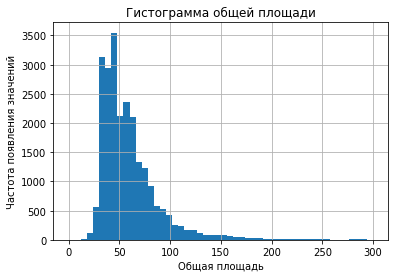

In [23]:
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Частота появления значений')
data['total_area'].hist(bins=50, range=(0, 300));

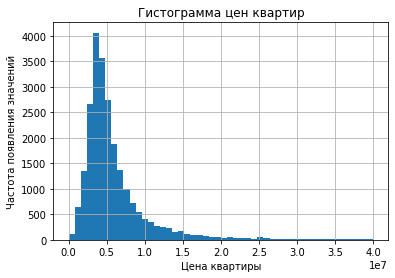

In [24]:
plt.title('Гистограмма цен квартир')
plt.xlabel('Цена квартиры')
plt.ylabel('Частота появления значений')
data['last_price'].hist(bins=50, range=(0, 40000000));

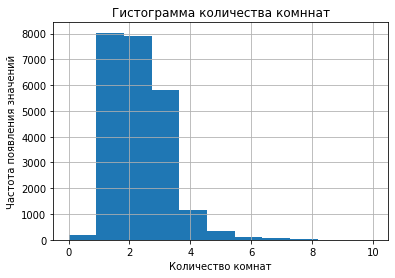

In [25]:
plt.title('Гистограмма количества комннат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота появления значений')
data['rooms'].hist(bins=11, range=(0, 10));

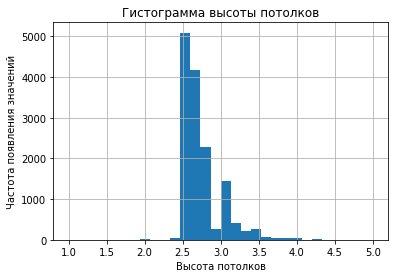

In [26]:
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота появления значений')
data['ceiling_height'].hist(bins=30, range=(1, 5));

Рассмотрим время продажи квартир, но для начала избавимя от нулевых строк.

Количество пропущенных значений в столбце "days_exposition" - 0
Статистика по столбцу "days_exposition": count    20469.000000
mean       180.761640
std        219.779967
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


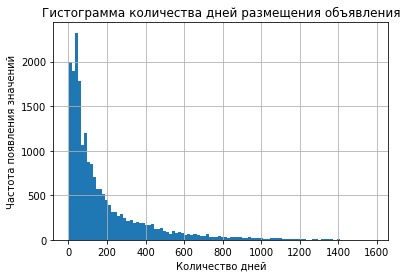

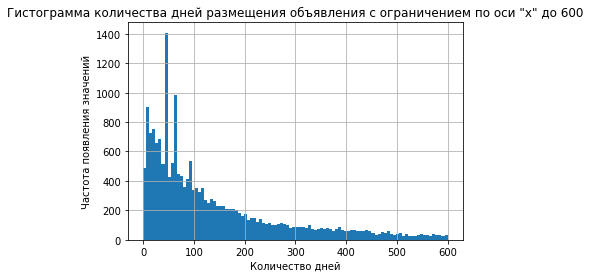

In [27]:
data_good_day_exp = data[data['days_exposition'] != 0].copy()
print('Количество пропущенных значений в столбце "days_exposition" -', data_good_day_exp['days_exposition'].isna().sum())
print('Статистика по столбцу "days_exposition":', data_good_day_exp['days_exposition'].describe())
plt.title('Гистограмма количества дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Частота появления значений')
data_good_day_exp['days_exposition'].hist(bins=100);
plt.show()
plt.title('Гистограмма количества дней размещения объявления с ограничением по оси "х" до 600')
plt.xlabel('Количество дней')
plt.ylabel('Частота появления значений')
data_good_day_exp['days_exposition'].hist(bins=100, range=(0, 600));

Минимальное количество дней от публикации до снятия это один день, возможно объявление было снято по каким-то особым причинам, либо было очень хорошее соотношение цены и качества, что её так быстро купили. 
Среднее количество дней равно 180, а вот медиана составила 95 дней. 95 дней - хороший срок для продажи квартиры, если меньше, то еще лучше. Если срок больше, то это можно отнести к индивидуальным особенностям квартиры: например отдаленный район, высокая цена, проблемы с документами, с собственниками/продавцами, высотой потолков и т.д.

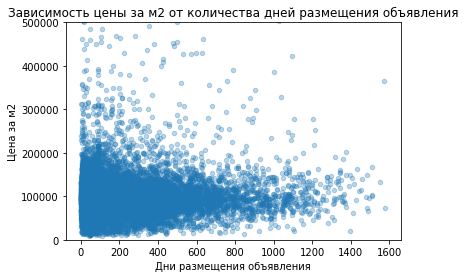

In [28]:
data_good_day_exp.plot(x='days_exposition', y='price_per_m2', kind='scatter', alpha=0.3, ylim=([0, 500000]), \
                       title='Зависимость цены за м2 от количества дней размещения объявления');
plt.xlabel('Дни размещения объявления')
plt.ylabel('Цена за м2')
plt.show()

Если посмотреть на зависимость длительности продажи от цены за квадратный метр, то можно увидеть, что квартиры могут продаваться быстро (до 95 дней), как в в дорогом, так и в дешевом ценовом сегменте. Но есть определенные квартиры с ценой за м2 от 50 000 до 150 000 рублей имеют тенденцию продаваться дольше. Квартиры с самой низкой ценой имеют тренд к более быстрым продажам, так как на графике после 200 дней их становится всё меньше.

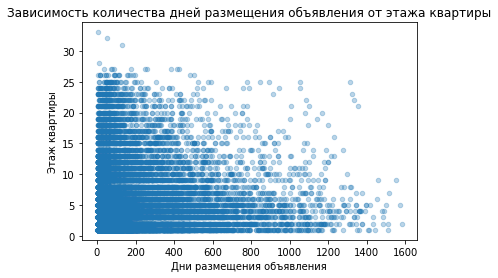

In [29]:
data_good_day_exp.plot(x='days_exposition', y='floor', kind='scatter', alpha=0.3);
plt.title('Зависимость количества дней размещения объявления от этажа квартиры')
plt.xlabel('Дни размещения объявления')
plt.ylabel('Этаж квартиры')
plt.show()

Чем выше этаж, тем быстрее продаётся квартира.

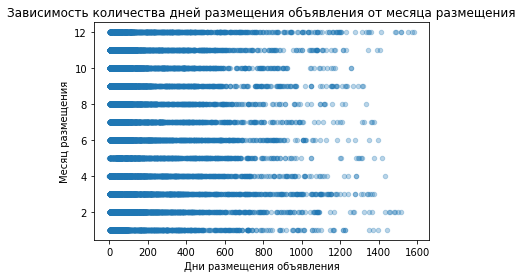

In [30]:
data_good_day_exp.plot(x='days_exposition', y='month', kind='scatter', alpha=0.3)
plt.title('Зависимость количества дней размещения объявления от месяца размещения')
plt.xlabel('Дни размещения объявления')
plt.ylabel('Месяц размещения')
plt.show()

Продажа квартиры имеет свою сезонность: объявления, созданные в феврале-марте, сентябре и декабре, висят на сайте дольше.

In [31]:
#напишем функию для удаления редких и выбивающихся значений и вывода статистики по улучшенным данным
def good_data_describe(df, column):
    q1 = df[column].quantile(0.25) #считаем квартиль 1
    q3 = df[column].quantile(0.75) #считаем квартиль 3
    iqr = q3-q1 #межквартильный размах
    print('Статистика для начальных данных по колонке', column, ':')
    print(df[column].describe())
    print()
    print('После удаления редких и выбивающихся значений: ')
    print(df.loc[((df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr)))][column].describe()) #задаем границы 

Редкие и выбивающиеся значения в столбцах 'last_price', 'total_area', 'rooms', 'ceiling_height' и 'living_area'.
Построим для них гистограммы.

In [32]:
good_data_describe(data, 'last_price')

Статистика для начальных данных по колонке last_price :
count    2.364900e+04
mean     6.541403e+06
std      1.089655e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

После удаления редких и выбивающихся значений: 
count    2.159400e+04
mean     4.839166e+06
std      2.217090e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64


In [33]:
good_data_describe(data, 'total_area')

Статистика для начальных данных по колонке total_area :
count    23649.000000
mean        60.327011
std         35.661158
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

После удаления редких и выбивающихся значений: 
count    22405.000000
mean        54.323245
std         19.346542
min         12.000000
25%         39.400000
50%         50.100000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64


После удаления редких и выбивающихся значений средняя цена и средняя общая площадь значительно уменьшились, на порядок уменьшились стандартные отклонения.

In [34]:
good_data_describe(data, 'rooms')

Статистика для начальных данных по колонке rooms :
count    23649.000000
mean         2.070109
std          1.078643
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

После удаления редких и выбивающихся значений: 
count    23559.000000
mean         2.047328
std          1.006858
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


На количество комнат удаление почти не повлияло. Изменилось лишь максимальное значение.

In [35]:
good_data_describe(data, 'ceiling_height')

Статистика для начальных данных по колонке ceiling_height :
count    14489.000000
mean         2.771289
std          1.261637
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

После удаления редких и выбивающихся значений: 
count    13663.000000
mean         2.679852
std          0.184025
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.210000
Name: ceiling_height, dtype: float64


Средняя высота потолков уменьшилась на 10 сантиметров, стандартное отклонение стало лишь 18 сантиметров.

In [36]:
good_data_describe(data, 'living_area')

Статистика для начальных данных по колонке living_area :
count    21751.000000
mean        34.448468
std         22.038165
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

После удаления редких и выбивающихся значений: 
count    20979.000000
mean        31.539261
std         13.934981
min          2.000000
25%         18.400000
50%         30.000000
75%         41.000000
max         77.800000
Name: living_area, dtype: float64


По жилой площади: изменилось среднее и стандартное отклонение

In [37]:
good_data_describe(data, 'price_per_m2')

Статистика для начальных данных по колонке price_per_m2 :
count    2.364900e+04
mean     9.943600e+04
std      5.033486e+04
min      7.962000e+03
25%      7.662100e+04
50%      9.500000e+04
75%      1.142770e+05
max      1.907500e+06
Name: price_per_m2, dtype: float64

После удаления редких и выбивающихся значений: 
count     22559.000000
mean      93773.011791
std       28631.983672
min       20140.000000
25%       76123.500000
50%       93913.000000
75%      111428.000000
max      170731.000000
Name: price_per_m2, dtype: float64


В целом очищенные от выбросов значения стали больше походить на правду.

Далее изучим, зависимость цены от площади, числа комнат, удалённости от центра.

In [38]:
data_corr_price = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest_km', 'ceiling_height', 'living_area']].copy()
data_corr_price.corr().round(2)

,last_price,total_area,rooms,cityCenters_nearest_km,ceiling_height,living_area
last_price,1.00,0.65,0.36,-0.21,0.09,0.57
total_area,0.65,1.00,0.76,-0.23,0.10,0.94
rooms,0.36,0.76,1.00,-0.18,0.05,0.85
cityCenters_nearest_km,-0.21,-0.23,-0.18,1.00,-0.09,-0.23
ceiling_height,0.09,0.10,0.05,-0.09,1.00,0.09
living_area,0.57,0.94,0.85,-0.23,0.09,1.00


Итак, цена имеет прямую зависимость в первую очередь от общей площади, близка жилая площадь, количество комнат и совсем незначительное значение имеет высота потолков. Так же цена имеет обратную зависимость от расстояния до центра, что вполне логично.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [39]:
#напишем функцию для удаления редких и выбивающихся значений
def del_rare(df, column):
    q1 = df[column].quantile(0.25) #считаем квартиль 1
    q3 = df[column].quantile(0.75) #считаем квартиль 3
    iqr = q3-q1 #межквартильный размах
    return df.loc[((df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr)))] #задаем границы

In [40]:
#построим сводную таблицу по данным
print(del_rare(data, 'last_price').pivot_table(index='floor_cat', values='last_price',\
                                               aggfunc=(['count', 'mean', 'median', 'min', 'max'])))

               count          mean     median        min         max
          last_price    last_price last_price last_price  last_price
floor_cat                                                           
другой         15736  5.032512e+06  4590000.0   450000.0  11894400.0
первый          2801  4.124411e+06  3800000.0   430000.0  11800000.0
последний       3057  4.498807e+06  4050000.0   430000.0  11820000.0


Больше всего в продаже квартир не первого и не последнего этажей. Это логично.
Минимальные и максимальные цены почти не отличаются, ведь дорогие и дешевые квартиры могут быть как на первом, так и на любых других этажах.
А вот средние значения и значения медианы сильно отличаются: на первом этаже квартиры на 250-370 тысяч дешевле, чем на последнем. Квартиры на других этажах дороже на 500-540 тысяч, чем на последних.

Изучим зависимость от даты размещения: дня недели, месяца и года

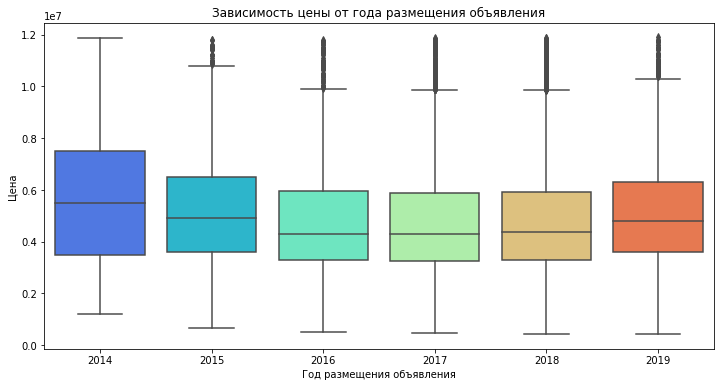

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="year", y="last_price", data=del_rare(data, 'last_price'), palette='rainbow');
plt.title('Зависимость цены от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена')
plt.show()

В 2014, в год кризиса, цены были выше, но после рынок стабилизировался и с 2018 виден небольшой рост

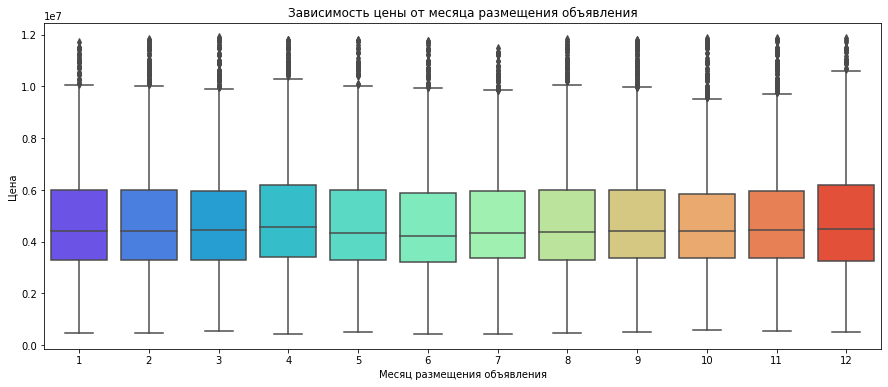

In [42]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="month", y="last_price", data=del_rare(data, 'last_price'), palette='rainbow');
plt.title('Зависимость цены от месяца размещения объявления')
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена')
plt.show()

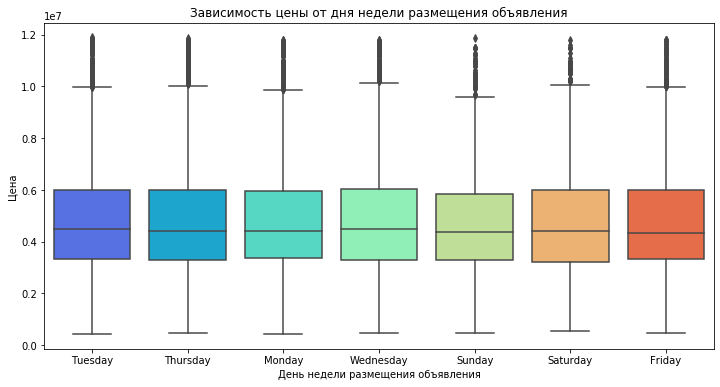

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="day", y="last_price", data=del_rare(data, 'last_price'), palette='rainbow');
plt.title('Зависимость цены от дня недели размещения объявления')
plt.xlabel('День недели размещения объявления')
plt.ylabel('Цена')
plt.show()

По месяцам и дням особой разницы в ценах нет.

Далее найдем 10 населенных пунктов с бОльшим количеством объявлений и посчитаем среднюю цену за м2 на жильё.

In [44]:
del_rare(data, 'price_per_m2').pivot_table(index='locality_name', values='price_per_m2', aggfunc=('count', 'mean'))\
                                            .sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,14808.0,106352.718125
поселок мурино,556.0,85681.305755
поселок шушары,440.0,78676.904545
всеволожск,397.0,67213.785894
пушкин,366.0,102147.762295
колпино,338.0,75424.150888
поселок парголово,327.0,90175.489297
гатчина,304.0,69294.148026
деревня кудрово,299.0,92473.086957


На первом месте по среденей цене СПБ, далее идет Пушкин(отрыв небольшой всего 3 тысячи за м2). В остальных населенных пунктах цены колеблются от 58 до 92 тысяч за м2.

Изучим предложения квартир в СПБ.

In [45]:
data_spb = data[data['locality_name'] == 'санкт-петербург'].copy() #создадим копию данных только с СПБ
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].round(0) #округлим до целых
print('Пустых значений в колонке расстояние до центра -', data_spb['cityCenters_nearest_km'].isna().sum())
data_spb.dropna(subset=['cityCenters_nearest_km'], inplace=True) #удалим пустые значения
data_spb = data_spb.reset_index(drop=True) #сбросим индекс
#data_spb = del_rare(data_spb, 'last_price') #удалим редкие и выбивающиеся значения
print('Пустых значений в колонке расстояние до центра после удаления -', data_spb['cityCenters_nearest_km'].isna().sum())
data_spb

Пустых значений в колонке расстояние до центра - 61
Пустых значений в колонке расстояние до центра после удаления - 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest_km,parks_nearest_km,ponds_nearest_km,price_per_m2,day,month,year,floor_cat,living_to_total_areas,kitchen_to_total_areas
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16.0,0.482,0.755,120370,Thursday,3,2019,другой,0.47,0.23
1,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,14.0,0.090,0.574,92785,Thursday,8,2015,другой,0.61,0.15
2,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,7.0,0.084,0.234,408176,Friday,7,2015,другой,NaN,NaN
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8.0,0.112,0.048,100000,Tuesday,6,2018,другой,0.32,0.41
4,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,12.0,NaN,NaN,110544,Thursday,4,2019,другой,NaN,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15654,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,16.0,0.353,0.652,100566,Wednesday,2,2018,другой,0.46,0.26
15655,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,False,...,6.0,0.300,NaN,105769,Thursday,7,2018,другой,0.60,0.12
15656,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,4.0,NaN,0.806,129903,Thursday,10,2016,другой,0.55,0.15
15657,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4.0,0.796,0.381,72490,Tuesday,3,2017,другой,0.55,0.10


In [46]:
price_per_km = data_spb['last_price'].sum() / data_spb['cityCenters_nearest_km'].sum() #посчитаем цену за километр
print(price_per_km)

692751.9942285982


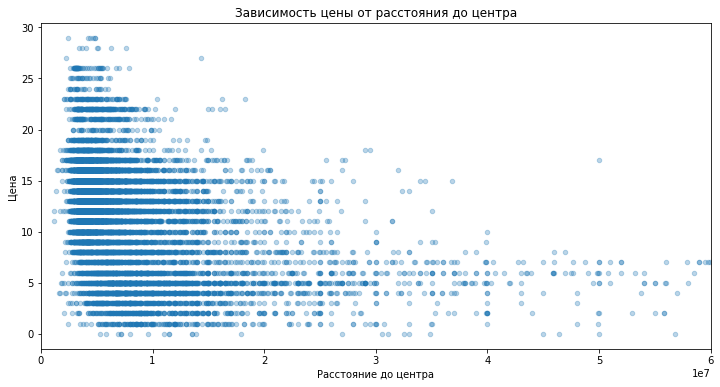

In [47]:
data_spb.plot(x='last_price', y='cityCenters_nearest_km', kind='scatter', alpha=0.3, figsize=(12, 6), xlim=([0, 60000000]));
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

Цена постепенно увеличивается после 24 километра, на 15 заметное увеличение, много значений появляется около 8 километра.
Будем считать центром расстояние в 8 км и меньше.

In [48]:
#используем функцию для удаления выбросов
print('Статистика по общей площади в пределах центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] <= 8], 'total_area')['total_area'].describe())
print()
print('Статистика по общей площади за пределами центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] > 8], 'total_area')['total_area'].describe())

Статистика по общей площади в пределах центра СПБ
count    3901.000000
mean       80.237862
std        34.976432
min        12.000000
25%        53.500000
50%        74.000000
75%       100.000000
max       185.000000
Name: total_area, dtype: float64

Статистика по общей площади за пределами центра СПБ
count    11101.000000
mean        52.280618
std         17.157153
min         13.000000
25%         39.000000
50%         48.200000
75%         62.600000
max        103.100000
Name: total_area, dtype: float64


Если смотреть на данные с удаленными выбросами, то в центре средняя площадь квартир значительно выше чем на периферии. Так же больше среднее отклонение. И в целом все параметры значительно превосходят периферию. Однозначно в центре квартиры больше.

In [49]:
#без удаления выбросов
print('Статистика по общей площади в пределах центра СПБ')
print(data_spb[data_spb['cityCenters_nearest_km'] <= 8]['total_area'].describe())
print()
print('Статистика по общей площади за пределами центра СПБ')
print(data_spb[data_spb['cityCenters_nearest_km'] > 8]['total_area'].describe())

Статистика по общей площади в пределах центра СПБ
count    4122.000000
mean       90.326659
std        58.882906
min        12.000000
25%        55.000000
50%        76.000000
75%       107.000000
max       900.000000
Name: total_area, dtype: float64

Статистика по общей площади за пределами центра СПБ
count    11537.000000
mean        55.483316
std         25.252764
min         13.000000
25%         39.400000
50%         49.800000
75%         64.900000
max        470.300000
Name: total_area, dtype: float64


В целом картина не меняется, если смотреть статистику по данным без выбросов. Зато теперь мы знаем, где находится квартира с супербольшой площадью. И на периферии есть квартиры с большой площадью.

In [50]:
#продолжим изучение с удалением выбросов, рассмотрим цену
print('Статистика по цене в пределах центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] <= 8], 'last_price')['last_price'].describe())
print()
print('Статистика по цене за пределами центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] > 8], 'last_price')['last_price'].describe())

Статистика по цене в пределах центра СПБ
count    3.721000e+03
mean     9.629593e+06
std      4.784515e+06
min      1.600000e+06
25%      6.200000e+06
50%      8.400000e+06
75%      1.199900e+07
max      2.502300e+07
Name: last_price, dtype: float64

Статистика по цене за пределами центра СПБ
count    1.070400e+04
mean     5.124125e+06
std      1.654475e+06
min      1.190000e+06
25%      3.900000e+06
50%      4.750000e+06
75%      6.000000e+06
max      1.030400e+07
Name: last_price, dtype: float64


Цены почти в 1,5-2 раза выше в центре

In [51]:
#продолжим изучение с удалением выбросов, рассмотрим количество комнат
print('Статистика по количеству комнат в пределах центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] <= 8], 'rooms')['rooms'].describe())
print()
print('Статистика по количеству комнат за пределами центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] > 8], 'rooms')['rooms'].describe())

Статистика по количеству комнат в пределах центра СПБ
count    3714.000000
mean        2.456381
std         0.942665
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

Статистика по количеству комнат за пределами центра СПБ
count    11530.000000
mean         1.957242
std          0.928903
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


В центре города преобладают 2-3 комнатные квартиры, на периферии 1-2 комнатные.

In [52]:
#продолжим изучение с удалением выбросов, рассмотрим высоту потолков
print('Статистика по высоте потолков в пределах центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] <= 8], 'ceiling_height')['ceiling_height'].describe())
print()
print('Статистика по высоте потолков за пределами центра СПБ')
print(del_rare(data_spb[data_spb['cityCenters_nearest_km'] > 8], 'ceiling_height')['ceiling_height'].describe())

Статистика по высоте потолков в пределах центра СПБ
count    2610.000000
mean        3.025939
std         0.312029
min         2.400000
25%         2.800000
50%         3.000000
75%         3.200000
max         3.900000
Name: ceiling_height, dtype: float64

Статистика по высоте потолков за пределами центра СПБ
count    7255.000000
mean        2.645515
std         0.142923
min         2.300000
25%         2.500000
50%         2.600000
75%         2.750000
max         3.120000
Name: ceiling_height, dtype: float64


В центре потолки на 30-50 сантиметров выше.
В целом по вышерассмотренным параметрам центр обыгрывает периферию, но соответственно и цены в центре выше, а цена как правило один из главных параметров во время принятия решения при покупке квартиры.

Выделим параметры влияющие на цену квартиры с помощью метода корреляции. Сначала изучим центр.

In [53]:
corr_citycenter_less8km = del_rare(data_spb[data_spb['cityCenters_nearest_km'] <= 8], 'last_price').corr().sort_values('last_price', ascending=False)\
                           .filter(items = ['last_price']).reset_index()
corr_citycenter_less8km['last_price'] = corr_citycenter_less8km['last_price'].round(2) #округлим для удобства
corr_citycenter_less8km

,index,last_price
0,last_price,1.00
1,total_area,0.74
2,living_area,0.64
3,kitchen_area,0.54
4,rooms,0.50
5,price_per_m2,0.45
6,floor,0.13
7,total_images,0.13
8,parks_around3000,0.10
9,balcony,0.08


Цена за квартиру больше всего зависит от цены за м2, но так как эту величину мы расчитывали делением цены на площадь, то её можно не учитывать.
Топ-4 параметров, влияющих на цену в центре, те у которых % влияния выше 30%.
1. Общая площадь
2. Жилая площадь
3. Площадь кухни
4. Количество комнат

In [54]:
corr_citycenter_more8km = del_rare(data_spb[data_spb['cityCenters_nearest_km'] > 8], 'last_price').corr().sort_values('last_price', ascending=False)\
                           .filter(items = ['last_price']).reset_index()
corr_citycenter_more8km['last_price'] = corr_citycenter_more8km['last_price'].round(2) #округлим для удобства
corr_citycenter_more8km

,index,last_price
0,last_price,1.00
1,total_area,0.80
2,living_area,0.64
3,rooms,0.51
4,kitchen_area,0.51
5,price_per_m2,0.32
6,floors_total,0.25
7,total_images,0.18
8,floor,0.15
9,balcony,0.15


На периферии картина примерно такая же как и в центре. Топ 4 совпадает.

Объединим два датафрейма(центр и периферия) для сравнения и найдем абсолютную разницу корреляции для центра и периферии

In [55]:
corr_citycenter = corr_citycenter_less8km.merge(corr_citycenter_more8km, on='index')
corr_citycenter = corr_citycenter.rename(columns={'last_price_x' : 'less8km_from_center',\
                                                  'last_price_y' : 'more8km_from_center'})
corr_citycenter['abs_difference'] = corr_citycenter['less8km_from_center'] - corr_citycenter['more8km_from_center']
corr_citycenter['abs_difference'] = corr_citycenter['abs_difference'].abs()
corr_citycenter.sort_values(by='abs_difference', ascending=False)

,index,less8km_from_center,more8km_from_center,abs_difference
10,floors_total,0.08,0.25,0.17
5,price_per_m2,0.45,0.32,0.13
18,year,-0.03,0.08,0.11
8,parks_around3000,0.10,0.00,0.10
23,kitchen_to_total_areas,-0.10,-0.18,0.08
24,cityCenters_nearest_km,-0.15,-0.08,0.07
9,balcony,0.08,0.15,0.07
1,total_area,0.74,0.80,0.06
21,ponds_nearest_km,-0.05,-0.00,0.05
12,days_exposition,0.06,0.01,0.05


Наибольшая абсолютная разница между центром и периферией в количестве этажей в доме: на периферии на цену очень сильно влияет данный параметр(величина корреляции = 0,25), а для центра она равна всего лишь 0,08.
Так же бОльшее влияние на цену квартир в центре, чем на периферии, оказывают следующие параметры: количество парков в радиусе 3 км., расстояние до центра, расстояние до водоёма, количеством дней от публикации до снятия, количество водоёмов в радиусе 3 км.
И наоборот, на цену квартир на периферии сильнее оказывают влияние параметры: год размещения объявления, отношение площади кухни к общей площади, количество балконов, общая площадь, число фотографий, студия или нет, высота потолков, расстояние до парка и аэропорта, этаж и количество комнат.

## Общий вывод  <a name="consecuence"></a>

Итак, мы провели анализ данных. Выявили большое количество пропусков в данных, которые заполняются автоматически. Нужно проверить программу, которая выполняет эту функцию. Высоту потолков можно заполнять по типовой серии дома(для многоэтажек) и если бы был доступ к этим данным. 
Очень странно, что имеются дубли в названиях населенных пунктов - обычно этот параметр выбирается из выпадающего списка или чего-то подобного. Было бы неплохо проверить это, почему так происходит.
Есть определенный сегмент квартир с ценой за м2 от 50 до 150 тысяч, которые продаются очень долго. Так же люди предпочитают выбирать этажи повыше, так как квартиры на низких этажах продаются дольше. На скорость продажи влияет сезонность.
Мы выяснили, что самые дорогие квартиры в Санкт-Петербурге и в городе Пушкин. В Санкт-Петербурге цены выше на квартире в центре города, но и параметры у них более лучшие: это общая площадь, высота потолков, количество комнат, и, разумеется, близость к центру. Так же выявили влияние всех параметров на цену, нашли топ-4 основных параметров влияющих на цену квартир.